In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pydataset as data
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

import wrangle
import split_scale
import feature_selection

Using the data on student grades from this lesson, complete the following:

In [2]:
df = pd.read_csv('student_grades.csv')

In [3]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [4]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
student_id     104 non-null int64
exam1          103 non-null float64
exam2          104 non-null int64
exam3          104 non-null object
final_grade    104 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [6]:
df.sort_values(by='exam1')

,student_id,exam1,exam2,exam3,final_grade
102,103,57.0,65,75,65
37,38,57.0,65,75,65
89,90,57.0,65,75,65
63,64,57.0,65,75,65
50,51,57.0,65,75,65
76,77,57.0,65,75,65
24,25,57.0,65,75,65
11,12,57.0,65,,65
23,24,58.0,65,70,68
101,102,58.0,65,70,68


In [7]:
df = df.dropna()

In [8]:
df.sort_values(by='exam1')

,student_id,exam1,exam2,exam3,final_grade
102,103,57.0,65,75,65
37,38,57.0,65,75,65
89,90,57.0,65,75,65
63,64,57.0,65,75,65
50,51,57.0,65,75,65
76,77,57.0,65,75,65
24,25,57.0,65,75,65
11,12,57.0,65,,65
23,24,58.0,65,70,68
101,102,58.0,65,70,68


In [9]:
df = df.drop([11])

In [10]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [11]:
train, test = train_test_split(df, train_size = .80, random_state = 123)

In [12]:
X_train = train.drop(columns='final_grade')
y_train = train[['final_grade']]
X_test = test.drop(columns='final_grade')
y_test = test[['final_grade']]

Create a model that uses exam 1 to predict the final grade

In [18]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
X_train1 = X_train[['exam1']]

In [20]:
X_train1.head()

,exam1
86,70.0
21,70.0
31,79.0
33,73.0
102,57.0


In [21]:
# Fitting the data to model
lm.fit(X_train1, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [21.9670409]
coefficients:  [[0.76249314]]


In [23]:
predictions = pd.DataFrame({
    'actual': y_train.final_grade
})
predictions.head()

,actual
86,77
21,77
31,81
33,76
102,65


In [24]:
predictions['exam1_predict'] = lm.predict(X_train1)

In [25]:
predictions.head()

,actual,exam1_predict
86,77,75.341560
21,77,75.341560
31,81,82.203999
33,76,77.629040
102,65,65.429150


Create a model that uses exam 2 to predict the final grade

In [13]:
X_train2 = X_train[['exam2']]

In [14]:
X_train2.head()

,exam2
86,65
21,65
31,70
33,70
102,65


In [15]:
lm1 = LinearRegression()

In [16]:
lm1.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print("Linear Model:", lm1)

print("intercept: ", lm1.intercept_)

print("coefficients: ", lm1.coef_)

Linear Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
intercept:  [6.21530132]
coefficients:  [[0.97471891]]


In [26]:
predictions['exam2_predict'] = lm.predict(X_train2)

In [27]:
predictions.head()

,actual,exam1_predict,exam2_predict
86,77,75.341560,71.529095
21,77,75.341560,71.529095
31,81,82.203999,75.341560
33,76,77.629040,75.341560
102,65,65.429150,71.529095


Compare your models in the following manner:
Calculate the mean squared error

In [29]:
import sklearn.metrics

In [30]:
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual            0.000000
exam1_predict     3.405933
exam2_predict    20.637010
dtype: float64

Visualize the residuals. Create a seperate visualization for each model.

In [31]:
predictions['exam1_residual'] = predictions.actual - predictions.exam1_predict

In [32]:
predictions['exam2_residual'] = predictions.actual - predictions.exam2_predict

In [33]:
predictions.head()

,actual,exam1_predict,exam2_predict,exam1_residual,exam2_residual
86,77,75.341560,71.529095,1.658440,5.470905
21,77,75.341560,71.529095,1.658440,5.470905
31,81,82.203999,75.341560,-1.203999,5.658440
33,76,77.629040,75.341560,-1.629040,0.658440
102,65,65.429150,71.529095,-0.429150,-6.529095


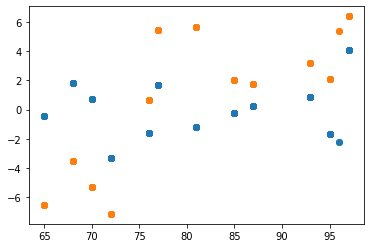

In [35]:
plt.scatter(predictions.actual, predictions.exam1_residual)
plt.scatter(predictions.actual, predictions.exam2_residual)



Visualize the actual vs the predicted values. Create a seperate visualization for each model.

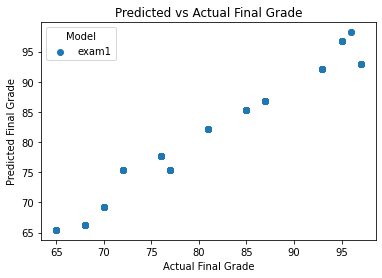

In [43]:
plt.scatter(predictions.actual, predictions.exam1_predict, label = 'exam1')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')
plt.legend(title='Model')

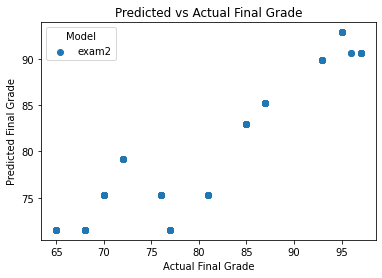

In [44]:
plt.scatter(predictions.actual, predictions.exam2_predict, label = 'exam2')
plt.ylabel('Predicted Final Grade')
plt.xlabel('Actual Final Grade')
plt.title('Predicted vs Actual Final Grade')
plt.legend(title='Model')

Create a model that uses exam 1 and exam 3 to predict final grade. How does this model compare to your previous ones?

In [48]:
X_train2 = X_train[['exam1', 'exam3']]

In [49]:
X_train2.head()

,exam1,exam3
86,70.0,78
21,70.0,78
31,79.0,85
33,73.0,75
102,57.0,75


In [50]:
lm3 = LinearRegression()

In [51]:
lm3.fit(X_train2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
predictions['exam1_3_predict'] = lm3.predict(X_train2)

In [54]:
predictions.head()

,actual,exam1_predict,exam2_predict,exam1_residual,exam2_residual,exam1_3_predict
86,77,75.341560,71.529095,1.658440,5.470905,75.055828
21,77,75.341560,71.529095,1.658440,5.470905,75.055828
31,81,82.203999,75.341560,-1.203999,5.658440,82.355741
33,76,77.629040,75.341560,-1.629040,0.658440,76.103539
102,65,65.429150,71.529095,-0.429150,-6.529095,66.358968


In [55]:
predictions.apply(lambda col: sklearn.metrics.mean_squared_error(predictions.actual, col))

actual                0.000000
exam1_predict         3.405933
exam2_predict        20.637010
exam1_residual     6613.668141
exam2_residual     6491.127637
exam1_3_predict       2.861172
dtype: float64

Take your best preforming model and measure its performance on the test data set. How does performance differ between train and test?

In [61]:
# any transformations applied to your training data must be applied to the test as well
X_test3 = X_test[['exam1', 'exam3']]

X_test_lm3 = lm3.predict(X_test3)

In [67]:
y_test.head()

,final_grade,test_prediction
8,77,75.055828
73,77,75.055828
91,96,97.743477
30,97,93.740027
65,96,97.743477


In [66]:
y_test['test_prediction'] = lm3.predict(X_test3)

In [68]:
y_test.apply(lambda col: sklearn.metrics.mean_squared_error(y_test.final_grade, col))

final_grade        0.000000
test_prediction    3.980122
dtype: float64

As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer.

Run all your previous scripts that acquired, prepared, split, and scaled the telco churn data.

In [70]:
telco = wrangle.wrangle_telco()

In [71]:
train, test = train_test_split(telco, train_size = .80, random_state = 123)

In [76]:
X_train = train[['monthly_charges', 'tenure']]
y_train = train[['total_charges']]

X_test = test[['monthly_charges', 'tenure']]
y_test = test[['total_charges']]

In [77]:
scaler, X_train_scaled,  X_test_scaled= split_scale.standard_scaler(X_train, X_test)

Fit 3 different linear models to your data, one with just tenure, one with just monthly_charges, and one with both.

In [81]:
t_predictions = pd.DataFrame({
    'actual': y_train.total_charges
})

In [80]:
lm = LinearRegression()

In [82]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
t_predictions['MC_Ten_predict'] = lm.predict(X_train)

In [84]:
t_predictions.head()

,actual,MC_Ten_predict
119,5212.65,5173.164121
1424,1079.05,1159.860706
385,7108.20,7011.897800
1140,6859.50,6567.278343
1504,8564.75,7707.376200


In [92]:
X_train1 = train[['tenure']]
y_train1 = train[['total_charges']]

X_test1 = test[['tenure']]
y_test1 = test[['total_charges']]

In [86]:
lm2 = LinearRegression()

In [87]:
lm2.fit(X_train1, y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
t_predictions['Tenure_predict'] = lm2.predict(X_train1)

In [90]:
t_predictions.head()

,actual,MC_Ten_predict,Tenure_predict
119,5212.65,5173.164121,4922.684960
1424,1079.05,1159.860706,3528.922066
385,7108.20,7011.897800,4458.097328
1140,6859.50,6567.278343,4922.684960
1504,8564.75,7707.376200,5015.602486


In [96]:
X_train2 = train[['monthly_charges']]
y_train2 = train[['total_charges']]

X_test2 = test[['monthly_charges']]
y_test2 = test[['total_charges']]

In [97]:
lm3 = LinearRegression()

In [98]:
lm3.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
t_predictions['MC_predict'] = lm3.predict(X_train2)

In [100]:
t_predictions.head()

,actual,MC_Ten_predict,Tenure_predict,MC_predict
119,5212.65,5173.164121,4922.684960,4760.739959
1424,1079.05,1159.860706,3528.922066,897.930302
385,7108.20,7011.897800,4458.097328,7108.516481
1140,6859.50,6567.278343,4922.684960,6356.248296
1504,8564.75,7707.376200,5015.602486,7612.361219


In [101]:
t_predictions.apply(lambda col: sklearn.metrics.mean_squared_error(t_predictions.actual, col))

actual            0.000000e+00
MC_Ten_predict    2.406230e+05
Tenure_predict    3.981691e+06
MC_predict        6.969530e+05
dtype: float64

In [102]:
y_test

,total_charges
305,1502.25
452,7567.20
917,7049.75
1421,1225.65
1557,587.40
...,...
1642,5728.55
460,611.45
1170,1787.35
1083,3084.90


In [103]:
y_test['test_prediction'] = lm.predict(X_test)

In [104]:
y_test

,total_charges,test_prediction
305,1502.25,1895.246555
452,7567.20,7234.552129
917,7049.75,6935.992336
1421,1225.65,1490.734855
1557,587.40,73.515425
...,...,...
1642,5728.55,5582.311800
460,611.45,92.122151
1170,1787.35,2182.629750
1083,3084.90,4148.227319


In [106]:
y_test.apply(lambda col: sklearn.metrics.mean_squared_error(y_test.total_charges, col))

total_charges           0.000000
test_prediction    262274.592792
dtype: float64